In [1]:
import os

path = './UTKFace'

dir_list = os.listdir(path)

print(len(dir_list))

23708


In [2]:
import os
import csv

path = './UTKFace'
dir_list = os.listdir(path)

# CSV 파일 생성 및 헤더 추가
with open('UTK_info.csv', 'w', newline='') as csvfile:
    fieldnames = ['path', 'gender', 'age']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    for file_name in dir_list:
        parts = file_name.split('_')
        age = parts[0]
        gender = parts[1]

        # 파일 이름과 성별 정보를 CSV 파일에 쓰기
        writer.writerow({'path': './dataset/UTKFace/'+file_name, 'gender': gender, 'age': age})

print("CSV 파일이 생성되었습니다.")


CSV 파일이 생성되었습니다.


In [3]:
import pandas as pd

df = pd.read_csv('UTK_info.csv')
print(df.head)

row_count = len(df)
print("행 개수:", row_count)

gender_count = df['gender'].value_counts()
print(gender_count)
print("0이 남자, 1이 여자입니다.")

<bound method NDFrame.head of                                                     path  gender  age
0      ./dataset/UTKFace/100_0_0_20170112213500903.jp...       0  100
1      ./dataset/UTKFace/100_0_0_20170112215240346.jp...       0  100
2      ./dataset/UTKFace/100_1_0_20170110183726390.jp...       1  100
3      ./dataset/UTKFace/100_1_0_20170112213001988.jp...       1  100
4      ./dataset/UTKFace/100_1_0_20170112213303693.jp...       1  100
...                                                  ...     ...  ...
23703  ./dataset/UTKFace/9_1_3_20161220222856346.jpg....       1    9
23704  ./dataset/UTKFace/9_1_3_20170104222949455.jpg....       1    9
23705  ./dataset/UTKFace/9_1_4_20170103200637399.jpg....       1    9
23706  ./dataset/UTKFace/9_1_4_20170103200814791.jpg....       1    9
23707  ./dataset/UTKFace/9_1_4_20170103213057382.jpg....       1    9

[23708 rows x 3 columns]>
행 개수: 23708
0    12391
1    11317
Name: gender, dtype: int64
0이 남자, 1이 여자입니다.


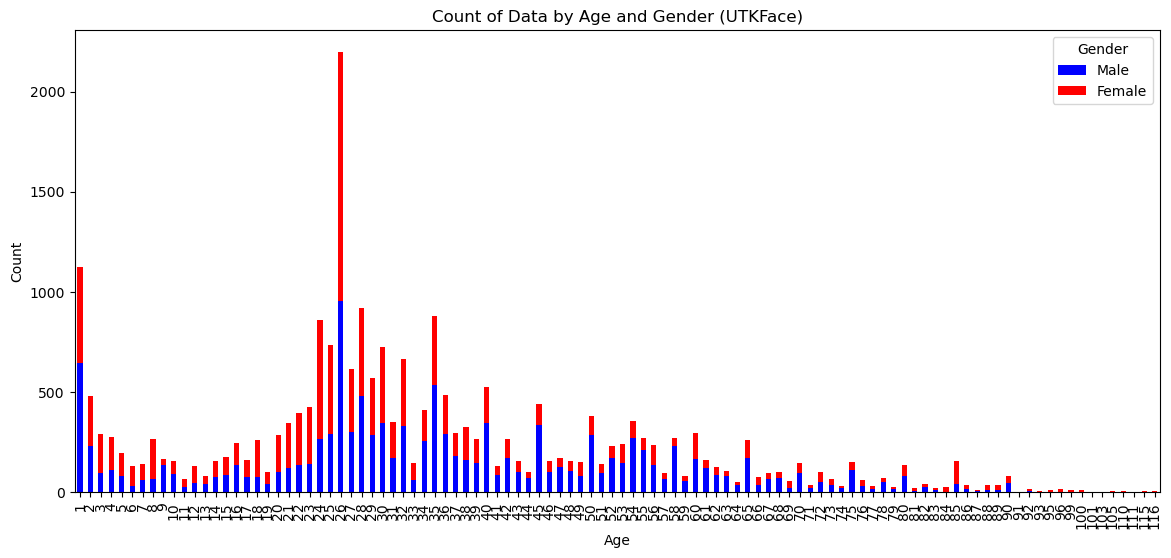

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UTK_info.csv')
age_gender_count = df.groupby(['age', 'gender']).size().unstack(fill_value=0)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 6))
age_gender_count.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of Data by Age and Gender (UTKFace)')
ax.legend(title='Gender', labels=['Male', 'Female'])
plt.show()


In [9]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('UTK_info.csv')

# 'age' 열의 값이 100 이상인 경우 해당 행 제거
df = df.drop(df[df['age'] > 100].index)

# 변경된 DataFrame 저장
df.to_csv('UTK_info.csv', index=False)


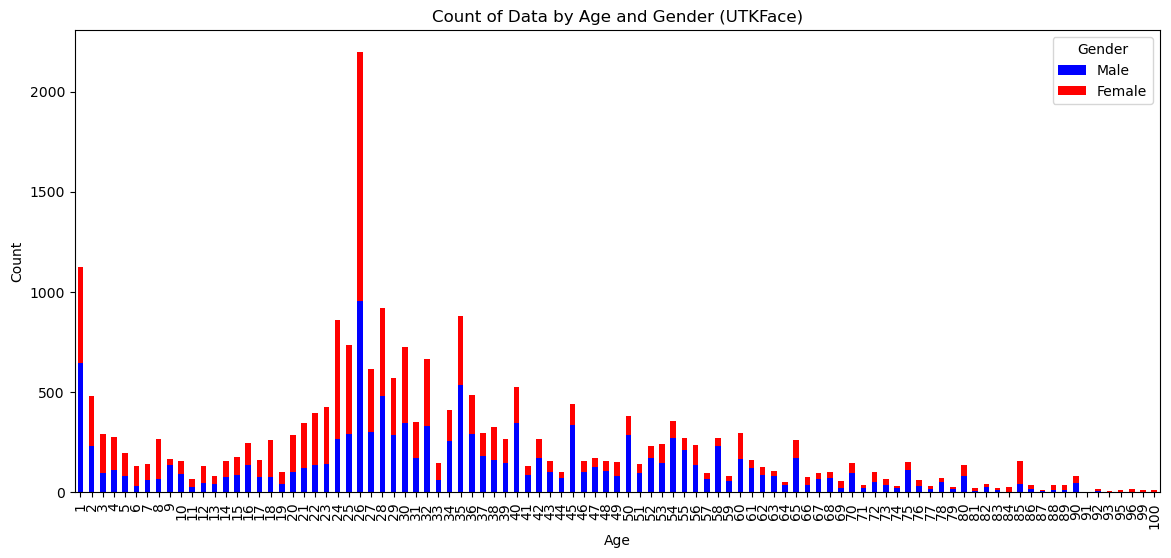

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('UTK_info.csv')
age_gender_count = df.groupby(['age', 'gender']).size().unstack(fill_value=0)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(14, 6))
age_gender_count.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=ax)
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Count of Data by Age and Gender (UTKFace)')
ax.legend(title='Gender', labels=['Male', 'Female'])
plt.show()
